In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
from ast import literal_eval

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure7/"

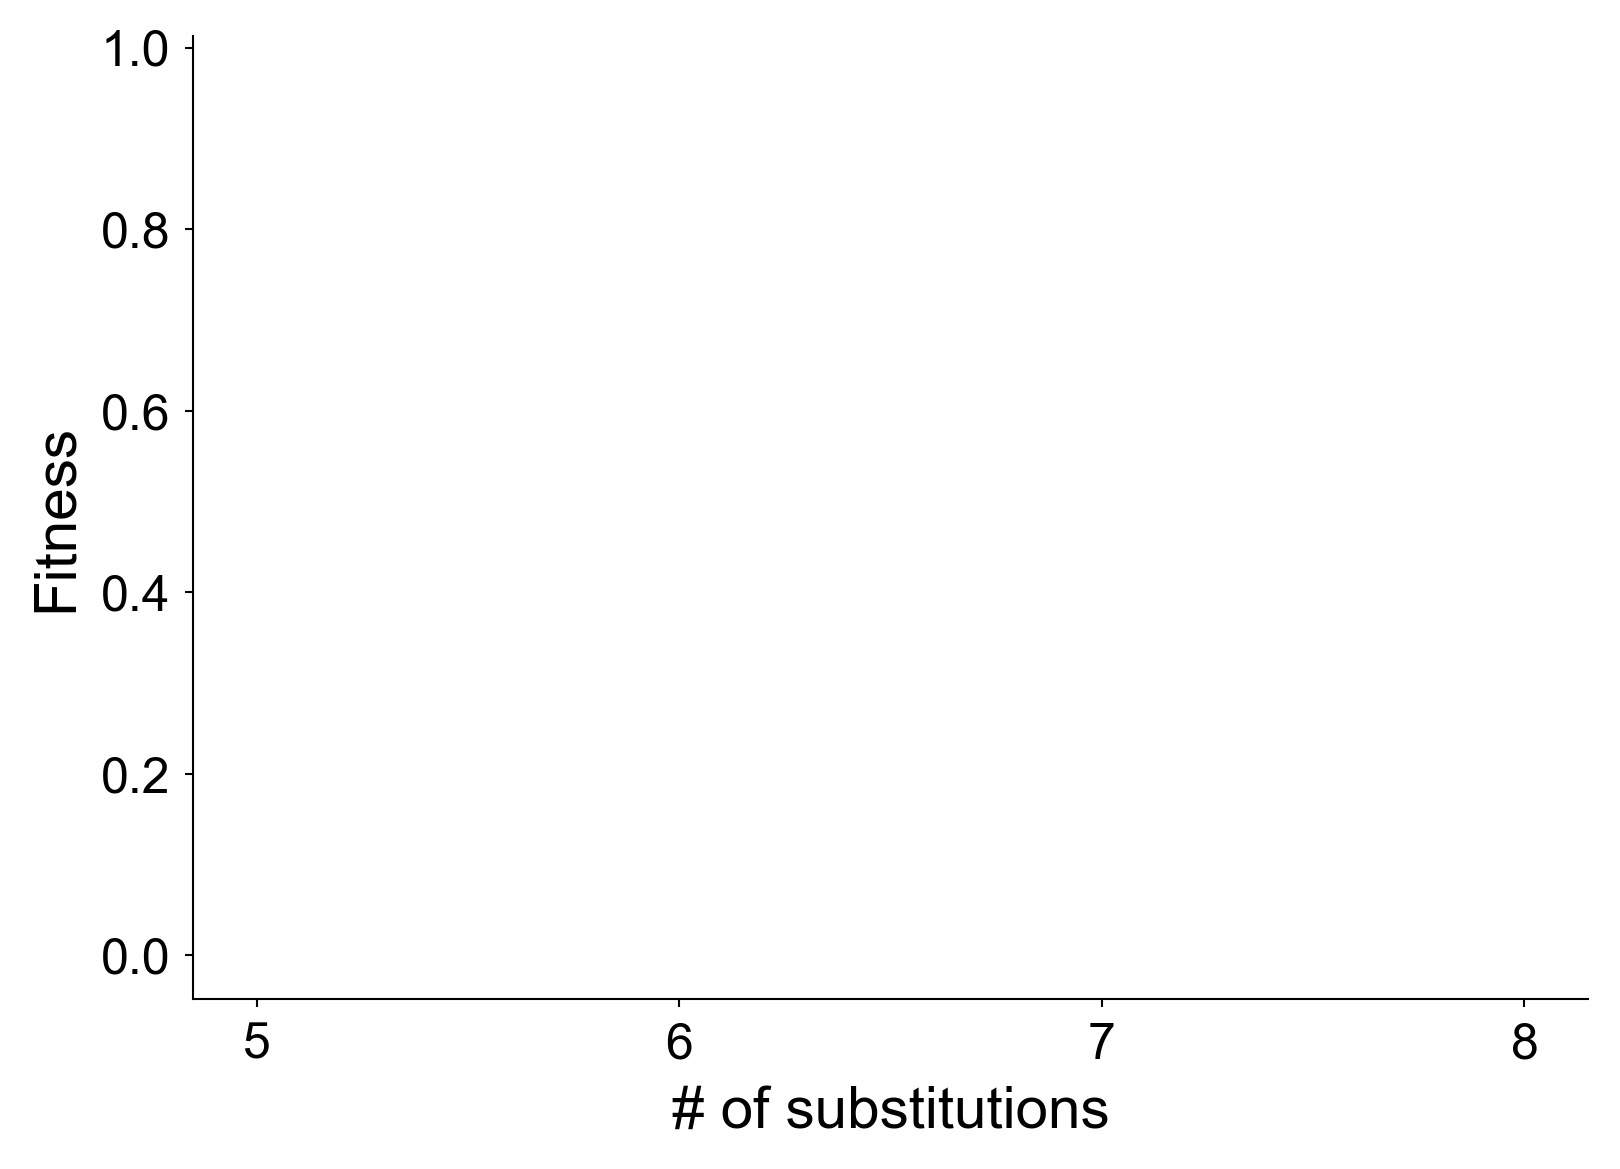

In [14]:
#replot the concept of super-compensation
plt.rcParams["figure.dpi"] = 300

plt.figure(figsize=(5.5,4))
ax = plt.subplot(111)
ax.scatter([5,6,6,7,6,7,7,8],
         [0.963998, 0.654154,0,0.654154,0.489229,0.489229+0.355354,0.096180,0.096180+0.602585],
          s =0.5,color = "white")

plt.xticks([5,6,7,8],[5,6,7,8],fontsize =12)
plt.yticks(fontsize = 12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
      
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)

plt.xlabel("# of substitutions",fontsize = 14)
plt.ylabel("Fitness",fontsize = 14)
plt.tight_layout()
#save figure
plt.savefig(savedata_dir + "CartoonSC.png", dpi = 300, format = "png")

In [17]:
#show an example that 110D is a SC
SC_data = pd.read_csv(readdata_dir + "SuperCompensationFile/SuperCompensation.tsv", sep = "\t")
SC_seg1 = SC_data.loc[(SC_data["segment"]==1) & (SC_data["big05_ratio"]>0),:]
SC_seg1

,pair,fitness_diff,all_big05,segment,big05_ratio
0,"('110H', '112T')","[-0.06654743159700016, -0.06644871775000016, 0...","(1717, 3)",1,0.001747
3,"('111F', '135F')","[-0.05800916611699991, -0.08611684957100008, 0...","(6290, 7)",1,0.001113
5,"('111F', '108I')","[0.008927361219000063, -0.030266743661000017, ...","(3539, 2)",1,0.000565
6,"('112T', '135F')","[-0.02435379094000001, -0.01622711533900001, 0...","(6484, 3)",1,0.000463
7,"('111F', '108M')","[0.07042348567900003, -0.011340463493999975, -...","(2986, 2)",1,0.000670
...,...,...,...,...,...
508,"('106N', '108V')","[-0.03280637783399998, -0.047546842329000194, ...","(2704, 1)",1,0.000370
509,"('131S', '110K')","[0.017062178406999973, 0.07756245484799995, 0....","(1837, 1)",1,0.000544
511,"('115A', '110Q')","[0.007675166260000088, -0.05890770569199999, 0...","(595, 1)",1,0.001681
513,"('110T', '108I')","[-0.030266743661000017, -0.04553009236499994, ...","(1503, 1)",1,0.000665


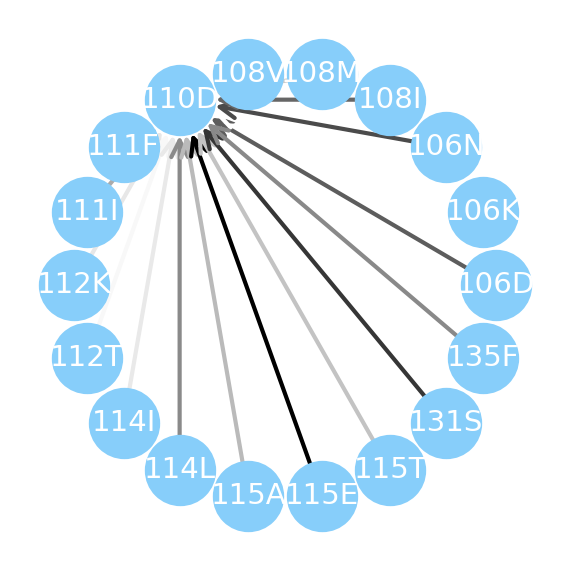

In [31]:
#plot the compensation ability of A110D
import networkx as nx
import re

a110d_row_list = [ ]
for row in range(SC_seg1.shape[0]):
    a,b = literal_eval(SC_seg1['pair'].values[row])
    if b == '110D':
        a110d_row_list.append(row)
a110d_data = SC_seg1.iloc[a110d_row_list,:]

#plot the results
egde_list = [eval(i) for i in a110d_data["pair"]]
G = nx.DiGraph()
        
node_list = []
for edge_pair in egde_list:
    a,b = edge_pair
    node_list.extend([a,b])
       
node_list = set(node_list)
node_list = list(node_list)
node_list.sort()
for node in node_list:
    G.add_node(node)
#add edges
G.add_edges_from(egde_list)
egde_weight = []
for edges in G.edges():
    edges_str = str(edges)
    egde_weight.append(SC_seg1[SC_seg1["pair"] == edges_str]["big05_ratio"].values[0])
           
#make the color list 
all_nodes_list = []
for node in G.node():
    all_nodes_list.append(int(re.findall('\d+',node)[0]))




#plot the results
plt.figure(figsize=(2,2))    
     
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = "lightskyblue" ,node_size=260)
nx.draw_networkx_edges(G, pos, arrowstyle='->',
                               arrowsize=10, 
                               edge_cmap=plt.cm.Greys,width=1,edge_color=egde_weight)
nx.draw_networkx_labels(G, pos, font_size = 7, font_color = "white")
ax = plt.gca()
ax.set_axis_off()
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "110D_compensation.png", dpi = 300)

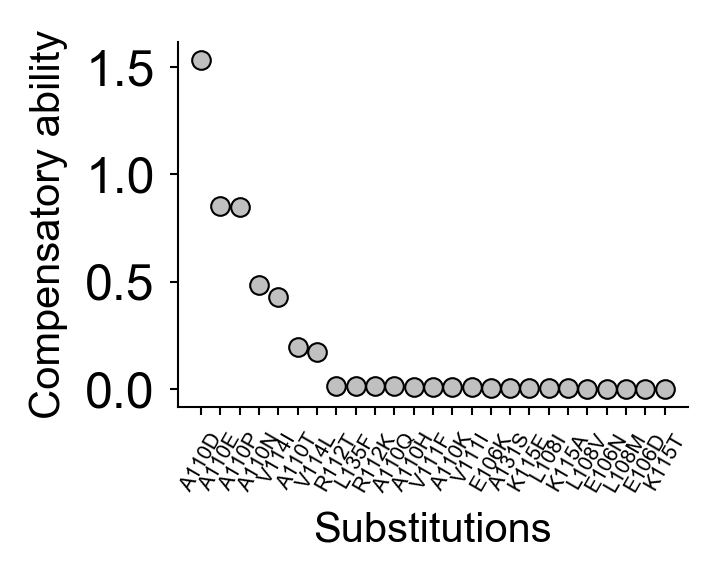

In [128]:
#the compensation ability of each substitutions from WT
aa_scer_list = "MTEQKALVKRITNETKIQIAISLKGGPLAIEHSIFPEKEAEAVAEQATQSQVINVHTGIGFLDHMIHALAKHSGWSLIVECIGDLHIDDHHTTEDCGIALGQAFKEALGAVRGVKRFGSGFAPLDEALSRAVVDLSNRPYAVVELGLQREKVGDLSCEMIPHFLESFAEASRITLHVDCLRGKNDHHRSESAFKALAVAIREATSPNGTNDVPSTKGVLM"
sc_compensationAbilityData = pd.read_csv(readdata_dir + "SuperCompensationFile/SC_compensationability.tsv",sep = "\t")
sc_compensationAbilityData_seg1 = sc_compensationAbilityData[sc_compensationAbilityData["segment"]==1]
plt.figure(figsize=(2.5,2))
ax = plt.subplot(111)

all_map_data_sort = sc_compensationAbilityData_seg1.sort_values("compensationAbility",
                                                                ascending = False)
ax.scatter(range(all_map_data_sort.shape[0]),
           all_map_data_sort["compensationAbility"].values,
           color="silver",s=20, 
          edgecolor = "black",linewidth = 0.5)


plt.yticks(fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
#set the xticks 
#modify the xticks
wt_aaState_list = [ ]
for single_aaState in all_map_data_sort["AAStates"]:
    single_pos = [int(i) for i in re.findall("\d+",single_aaState)][0]
    single_aa = single_aaState[-1]
    
    wt_aaState_list.append("%s%d%s"%(aa_scer_list[single_pos-1],
                                    single_pos,
                                    single_aa))
    
plt.xticks(range(all_map_data_sort.shape[0]),wt_aaState_list, 
           rotation = 60, fontsize=5)

#save the figure
plt.xlabel("Substitutions")
plt.ylabel("Compensatory ability")
plt.tight_layout()
plt.savefig(savedata_dir + 
           "compensationabillitySeg1.png", dpi = 300)


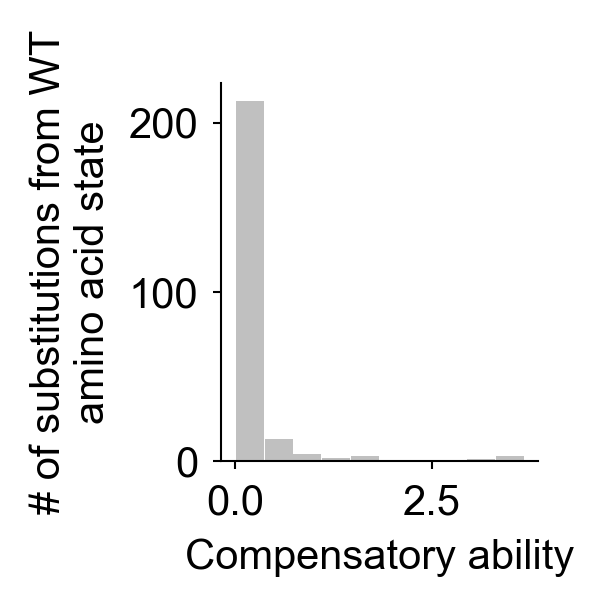

In [129]:
#plot the distribution of the whole AA states 
plt.figure(figsize=(2,2))
ax = plt.subplot(111)
plt.hist(sc_compensationAbilityData["compensationAbility"],
        color = "silver",rwidth = 0.97)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)

plt.xlabel("Compensatory ability")
plt.ylabel("# of substitutions from WT\namino acid state")
plt.tight_layout()
plt.savefig(savedata_dir + "SC_compensationAbilityDistribution.png",dpi = 300)

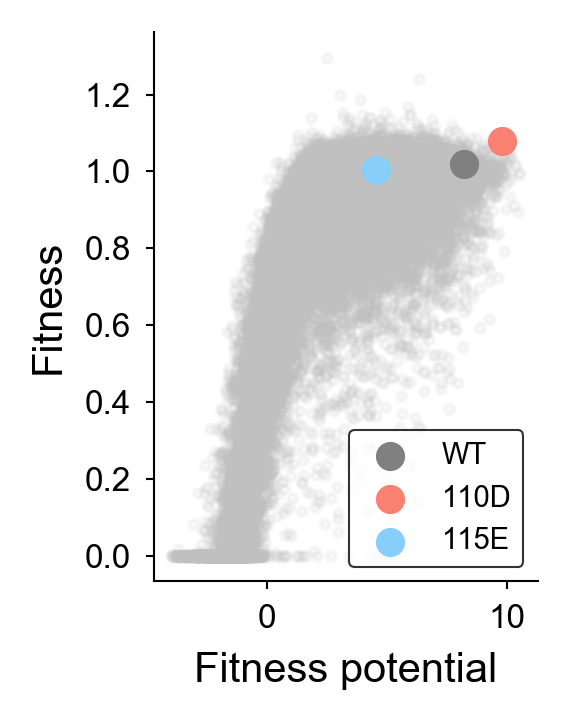

In [107]:
#to say that the NN model can predict fitnss using fitness poptential very well
seg1_predictData = pd.read_csv(readdata_dir + "DeepLearningWeights/EachGenotypeFitnessPredicted1.tsv",
                              sep = "\t")

wt = [8.200222600251436,1.0194867989799998]
A110D = [9.804758358746767,1.07917206616]
K115E = [4.549105513840914,1.0045073916399998]

plt.figure(figsize=(2,2.5))
ax = plt.subplot(111)
chunk = 1

X = seg1_predictData["-1*fitnessPotential"]
y = seg1_predictData["fitnessTrue"]
plt.scatter(X, y,s=5, color='silver',alpha = 0.1)
#add the WT:115E:110D
ax1 = plt.scatter(wt[0],wt[1], color = "grey")
ax2 = plt.scatter(A110D[0],A110D[1],color = "salmon")
ax3 = plt.scatter(K115E[0], K115E[1], color = "lightskyblue")
#add the legend
legend  = plt.legend([ ax1,ax2,ax3], [ 'WT','110D','115E'], 
                     scatterpoints=1,edgecolor='black',fontsize=7)    
legend = legend.get_frame().set_linewidth(0.5)

#modify the xticks and yticks
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize = 8)
plt.xticks(fontsize = 8)
#plt.xticks([-5,0,5],[0,10,20],fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.xlabel("Fitness potential",fontsize = 10)
plt.ylabel("Fitness",fontsize = 10)
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "FPCanPredictFitness.png",dpi = 300)

In [112]:
fp_singleAAData

,AAstate,compensationAbility,FI_mean,FI_std
0,106D,0.000000,-1.451697,0.025353
1,106K,0.004554,-0.352358,0.016681
2,106N,0.000000,-1.380370,0.018621
3,131S,0.003444,-3.366816,0.034578
4,135F,0.014011,-1.247443,0.014505
...,...,...,...,...
212,9R,0.000000,0.120027,0.029998
213,9S,0.002716,-0.209753,0.017870
214,11D,0.003885,-0.506657,0.017973
215,11N,0.002451,-0.319405,0.025079


C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


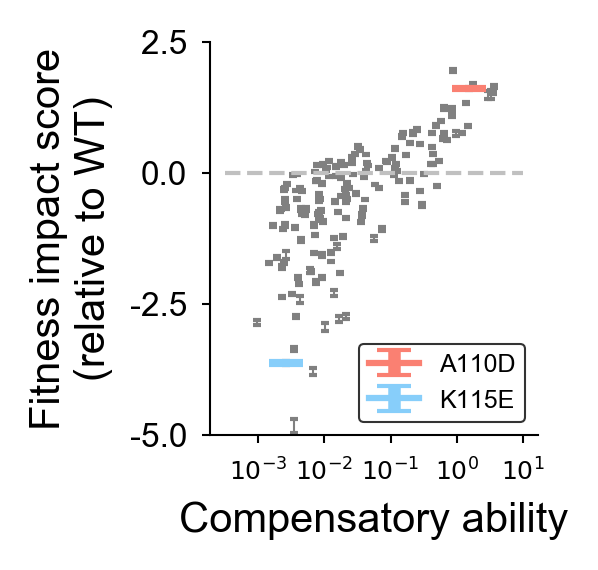

In [130]:
#show that CA and FP_weights are highly correlated!
fp_singleAAData  = pd.read_csv(readdata_dir + "DeepLearningWeights/DLWeightsFI.tsv",
                              sep = "\t")
CAbig0Data = fp_singleAAData[fp_singleAAData["compensationAbility"]>0]
CAbig0Data['logOfCA'] = [np.log10(i) for i in CAbig0Data['compensationAbility'].values]

plt.figure(figsize=(2,2))
ax = plt.subplot(111)

for row in range(CAbig0Data.shape[0]):
    plt.errorbar(CAbig0Data['logOfCA'].values[row], CAbig0Data['FI_mean'].values[row],
                 yerr = CAbig0Data['FI_std'].values[row],
                color='grey',elinewidth=0.5,
                 markersize=0.2,capsize=1)
#set the range of the xticks
D110 = fp_singleAAData[fp_singleAAData["AAstate"] == '110D']
E115 = fp_singleAAData[fp_singleAAData["AAstate"] == '115E']
                         
A110D = [D110["FI_mean"].values[0],
        D110["FI_std"].values[0],
        D110["compensationAbility"].values[0]]


K115E = [E115["FI_mean"].values[0],
         E115["FI_std"].values[0],
        E115["compensationAbility"].values[0]]

plt.errorbar(np.log10(float(A110D[2])), A110D[0],yerr = A110D[1],
            color='salmon',elinewidth=3.0,markersize=1.0,capsize=4,label = "A110D")

plt.errorbar(np.log10(float(K115E[2])), K115E[0],yerr = K115E[1],
            color='lightskyblue',elinewidth=3.0,markersize=1.0,capsize=4,label = 'K115E')

#legne
legend = plt.legend( loc='lower right', scatterpoints=1,edgecolor='black',fontsize=6) 
legend.get_frame().set_linewidth(0.5)


plt.xticks([-3,-2,-1,0,1],['$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$','$10^{1}$']
,fontsize = 6)

plt.plot([-3.5,1],[0,0],ls = "--",color= 'silver',linewidth=1)

plt.yticks([-7.5,-5.0,-2.5,0.0,2.5],[-7.5,-5.0,-2.5,0.0,2.5],fontsize = 8)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)

#add the results of WT(grey),A110D(red),K115E(green)
#save figure
plt.xlabel("Compensatory ability",fontsize = 10)
plt.ylabel("Fitness impact score\n(relative to WT)", fontsize = 10)
plt.tight_layout()
#sve the fiture
plt.ylim(-5,2.5)
#save the figure
plt.savefig(savedata_dir + "FIScoreVSCA.png",dpi = 300)
